# Finding the best markets to advertise in

- We are working for an e-learning company that offers courses on programming. Our goal is to find the two best markets to advertise in.

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading in the data
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
fcc.head()


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We could organize a survey, but that wouldn't be as cost effective as using existing data organized by one of the largest organizations in the programming space, FreeCodeCamp.
- This data set contains information pertaining to to questions for new coders
- The data can be found here https://github.com/freeCodeCamp/2017-new-coder-survey

In [5]:
# Frequency distribution table for job roles
fcc['JobRoleInterest'].value_counts(normalize = True) * 100


Full-Stack Web Developer                                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                                  2.030892
  Mobile Developer                  

- Most people are interested in some kind of web development, whether that be front end, back end, or full stack. A minority of people are interested in mobile apps.

In [7]:
# drop null values
interest_no_nulls = fcc['JobRoleInterest'].dropna()

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


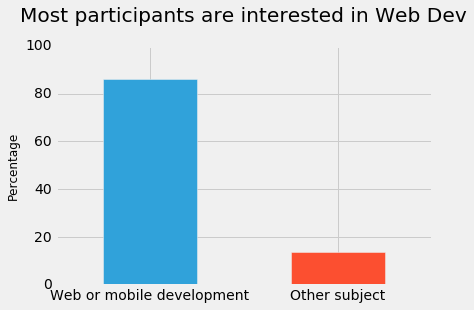

In [8]:
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')

freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most participants are interested in Web Dev', y = 1.08)

plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1], ['Web or mobile development', 'Other subject'], rotation = 0)

plt.ylim([0, 100])
plt.show()

- Roughly 86% of people in this survey are interested in web or mobile development. We want to find a way to appeal to people interested commensurate to the results of this data, IE focus mostly on the web and mobile developemt but still advertise to other programming niches.

In [9]:
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

#Frequency tables with absolute and relative frequencies
absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100

#Displaying the data as a DataFrame
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies,
                     'Percentage': relative_frequencies}
            )


,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


- Almost half of the potential customers are in the US; everywhere else has mixed results

In [10]:
# Replace 0s with 1s to avoid division by 0
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)

# New column for the amount of money each student spends each month
fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()

675

In [11]:
# Keep only the rows with non-nulls in the `money_per_month` column 
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]

In [12]:
# Remove the rows with null values in 'CountryLive'
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

# Frequency table to check if we still have enough data
fcc_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [13]:
# Mean sum of money spent by students each month
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

- Suprisingly, the United Kingdom has the least money per month out of the top 4, and India has the second most. Perhaps India has more disposable income to spend or values education more and has more to spend

In [ ]:
only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = only_4)

plt.title('Money Spent Per Month Per Country', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [ ]:
#narrow values to those under 20,000
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

In [ ]:
# Recompute mean sum of money spent by students each month
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

In [ ]:
#Looking at top 4

only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = only_4)

plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [ ]:
#identifying India outliers
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') &
    (only_4['money_per_month'] >= 2500)
]
print(india_outliers)

In [ ]:
#dropping india outliers
only_4 = only_4.drop(india_outliers.index)

In [ ]:
# Examine the extreme outliers for the US
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000)]

us_outliers

In [ ]:
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)

less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [ ]:
# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_per_month'] > 4500)]

canada_outliers

In [ ]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(canada_outliers.index)

In [ ]:
# Recompute mean sum of money spent by students each month
only_4.groupby('CountryLive').mean()['money_per_month']

In [ ]:
# Visualize the distributions again
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

- It makes sense to advertise in two countries, the US and Canadas as they have the largest amount to spend on education.
- It makes sense to split the budget 70% United States and 30% Canada to reflect the amount of money being spent
- Because India and Canada are relatively close, it would make sense to send the marketing team the results and let them use their domain knowledge to make the best decision.

In this project, we analyzed survey data from new coders to find the two best market to spend the marketing budget on.